## 1. Experiment result

In [1]:
from COSC_4117EL_A2_G2 import GridWorld, MDPAgent, QLearningAgent, execute_policy
import numpy as np
import random
from tqdm.notebook import tqdm
import json

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
ql_alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
ql_epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]

In [3]:
# Rerunning the Q-Learning part of the experiment collection
raw_results = {
    "MDP": {},
    "Q-Learning": {}
}

for seed in tqdm(range(1, 11)):  # 10 different random seeds
    random.seed(seed)               
    world = GridWorld()
    mdp_agent = MDPAgent(world)
    _, policy, episodes = mdp_agent.value_iteration()
    score = execute_policy(policy, world)
    episodes = np.nan if np.isnan(score) else episodes
    if not raw_results["MDP"]:
        raw_results["MDP"] = {"episodes": [], "scores": []}
    raw_results["MDP"]["episodes"].append(episodes)
    raw_results["MDP"]["scores"].append(world.score)
                
    # For each Q-Learning parameter combination
    for alpha in ql_alphas:
        for epsilon in ql_epsilons:
            world = GridWorld()
            ql_agent = QLearningAgent(world)
            _, policy, episodes = ql_agent.q_learning(alpha=alpha, epsilon=epsilon)
            score = execute_policy(policy, world)
            episodes = np.nan if np.isnan(score) else episodes
            key = f"alpha_{alpha}_epsilon_{epsilon}"
            if key not in raw_results["Q-Learning"]:
                raw_results["Q-Learning"][key] = {"episodes": [], "scores": []}
            raw_results["Q-Learning"][key]["episodes"].append(episodes)
            raw_results["Q-Learning"][key]["scores"].append(score)

  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
with open("./res/results.json", "w") as f:
    json.dump(raw_results, f)

In [5]:
with open("./res/results.json", "r") as f:
    results_data = json.load(f)

## 2. Reshape results

In [6]:
import pandas as pd

# Extracting MDP results
mdp_episodes = results_data['MDP']['episodes']
mdp_scores = results_data['MDP']['scores']

# Creating the MDP DataFrame
mdp_df = pd.DataFrame({
    'Method': 'MDP',
    'Alpha': '-',
    'Epsilon': '-',
    'Episodes for Convergence': mdp_episodes,
    'Final Scores': mdp_scores
})

# Correctly extracting Q-Learning results based on the observed structure
ql_results = results_data['Q-Learning']

# Creating DataFrames for Q-Learning results
ql_dfs = []
for key in ql_results.keys():
    alpha, epsilon = key.split('_')[1], key.split('_')[3]
    df = pd.DataFrame({
        'Method': 'Q-Learning',
        'Alpha': alpha,
        'Epsilon': epsilon,
        'Episodes for Convergence': ql_results[key]['episodes'],
        'Final Scores': ql_results[key]['scores']
    })
    ql_dfs.append(df)
    
# Combine MDP and Q-Learning DataFrames
results_df = pd.concat([mdp_df] + ql_dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame for an overview
results_df.head()


,Method,Alpha,Epsilon,Episodes for Convergence,Final Scores
0,MDP,-,-,21,118.659000
1,MDP,-,-,51,126.220000
2,MDP,-,-,27,51.771857
3,MDP,-,-,41,141.800000
4,MDP,-,-,89,94.949380


In [7]:
results_df.to_excel('./res/results.xlsx', index=False, engine='openpyxl')

In [8]:
results_df = pd.read_excel('./res/results.xlsx')
results_df

,Method,Alpha,Epsilon,Episodes for Convergence,Final Scores
0,MDP,-,-,21,118.659000
1,MDP,-,-,51,126.220000
2,MDP,-,-,27,51.771857
3,MDP,-,-,41,141.800000
4,MDP,-,-,89,94.949380
...,...,...,...,...,...
255,Q-Learning,0.9,0.9,108,80.618657
256,Q-Learning,0.9,0.9,107,40.071186
257,Q-Learning,0.9,0.9,95,85.283300
258,Q-Learning,0.9,0.9,101,126.220000


In [9]:
# Computing statistics for MDP
mdp_stats = results_df[results_df['Method'] == 'MDP'].agg({
    'Episodes for Convergence': ['mean', 'std', 'min', 'max'],
    'Final Scores': ['mean', 'std', 'min', 'max']
})

# Computing statistics for Q-Learning based on different combinations of alpha and epsilon
ql_stats = results_df[results_df['Method'] == 'Q-Learning'].groupby(['Alpha', 'Epsilon']).agg({
    'Episodes for Convergence': ['mean', 'std', 'min', 'max'],
    'Final Scores': ['mean', 'std', 'min', 'max']
})

In [10]:
mdp_stats

,Episodes for Convergence,Final Scores
mean,36.100000,111.509760
std,20.738852,32.207292
min,21.000000,51.771857
max,89.000000,169.000000


In [11]:
ql_stats

Episodes for Convergence                         Final Scores  \
                                  mean         std   min   max         mean   
Alpha Epsilon                                                                 
0.1   0.1                       2560.2  608.710258  1398  3393   100.593201   
      0.3                       1962.2  295.674295  1789  2782   114.638338   
      0.5                       1346.6  495.622885  1147  2753   118.786535   
      0.7                       1131.1  360.148874   949  2148   114.927808   
      0.9                       1488.5  741.143149   999  2962    93.783358   
0.3   0.1                       1255.5  301.858779   743  1642   119.579798   
      0.3                        693.5  124.981999   616  1041   130.033279   
      0.5                        490.8  199.397871   394  1054    95.624245   
      0.7                        430.5  241.878413   337  1118   117.596353   
      0.9                        469.9  329.020921   328  1403   117.835394   
0.5   0.1                        764.6  153.941692   474  1028   103.463978   
      0.3                        416.2   81.393147   357   640   113.356202   
      0.5                        266.7   13.224976   249   293   102.158227   
      0.7                        235.7   63.810570   193   414    96.652550   
      0.9                        228.2   18.659522   205   268   118.812054   
0.7   0.1                        534.6   56.000397   428   615   135.321064   
      0.3                        264.7   14.514743   244   297   109.684612   
      0.5                        220.7  144.182022   151   625   102.834343   
      0.7                        139.3   10.165847   126   152   114.263077   
      0.9                        150.4   11.635196   129   166   108.102389   
0.9   0.1                        322.1   85.253152   223   494   119.623671   
      0.3                        169.1   18.150298   150   213   125.084793   
      0.5                        118.1   11.009592   105   138    99.361880   
      0.7                        114.1   58.129071    88   278   124.767126   
      0.9                        111.7   36.429689    86   208    97.101648   

                                             
                     std        min     max  
Alpha Epsilon                                
0.1   0.1      34.300316  55.080579  141.80  
      0.3      37.176083  60.859498  168.00  
      0.5      42.074964  62.518657  199.00  
      0.7      33.265219  77.093442  199.00  
      0.9      38.200823  53.533692  178.00  
0.3   0.1      42.039061  70.369380  178.00  
      0.3      27.367903  94.269000  178.00  
      0.5      32.365263  47.904700  150.80  
      0.7      44.140257  64.431016  199.00  
      0.9      42.556596  56.877067  178.00  
0.5   0.1      39.799133  45.263938  178.00  
      0.3      44.669934  54.880323  199.00  
      0.5      27.115527  67.484098  136.22  
      0.7      26.982661  69.559380  150.80  
      0.9      44.132388  51.755661  199.00  
0.7   0.1      37.305255  77.093442  178.00  
      0.3      33.390117  48.268876  159.00  
      0.5      49.348287   0.000000  178.00  
      0.7      37.510437  55.080579  169.00  
      0.9      52.270702   0.000000  178.00  
0.9   0.1      37.690603  61.938423  188.00  
      0.3      43.192733  70.737529  199.00  
      0.5      42.211579  50.381201  151.80  
      0.7      43.841867  63.166791  188.00  
      0.9      40.659168  40.071186  159.90

In [12]:
# Create a new Excel writer object
writer = pd.ExcelWriter('./res/results2.xlsx', engine='openpyxl')

# Save the mdp_stats DataFrame to Sheet2 of the Excel file
mdp_stats.to_excel(writer, sheet_name="mdp_stats")

# Save the ql_stats DataFrame to Sheet3 of the Excel file
ql_stats.to_excel(writer, sheet_name="ql_stats")

# Save the Excel file
writer.save()

C:\Users\Holic\AppData\Local\Temp\ipykernel_125364\3267706032.py:11: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [13]:
# # Load the Excel file
# mdp_stats = pd.read_excel('./res/results2.xlsx', sheet_name='mdp_stats', engine='openpyxl')
# ql_stats = pd.read_excel('./res/results2.xlsx', sheet_name='ql_stats', engine='openpyxl')

## Visualize results

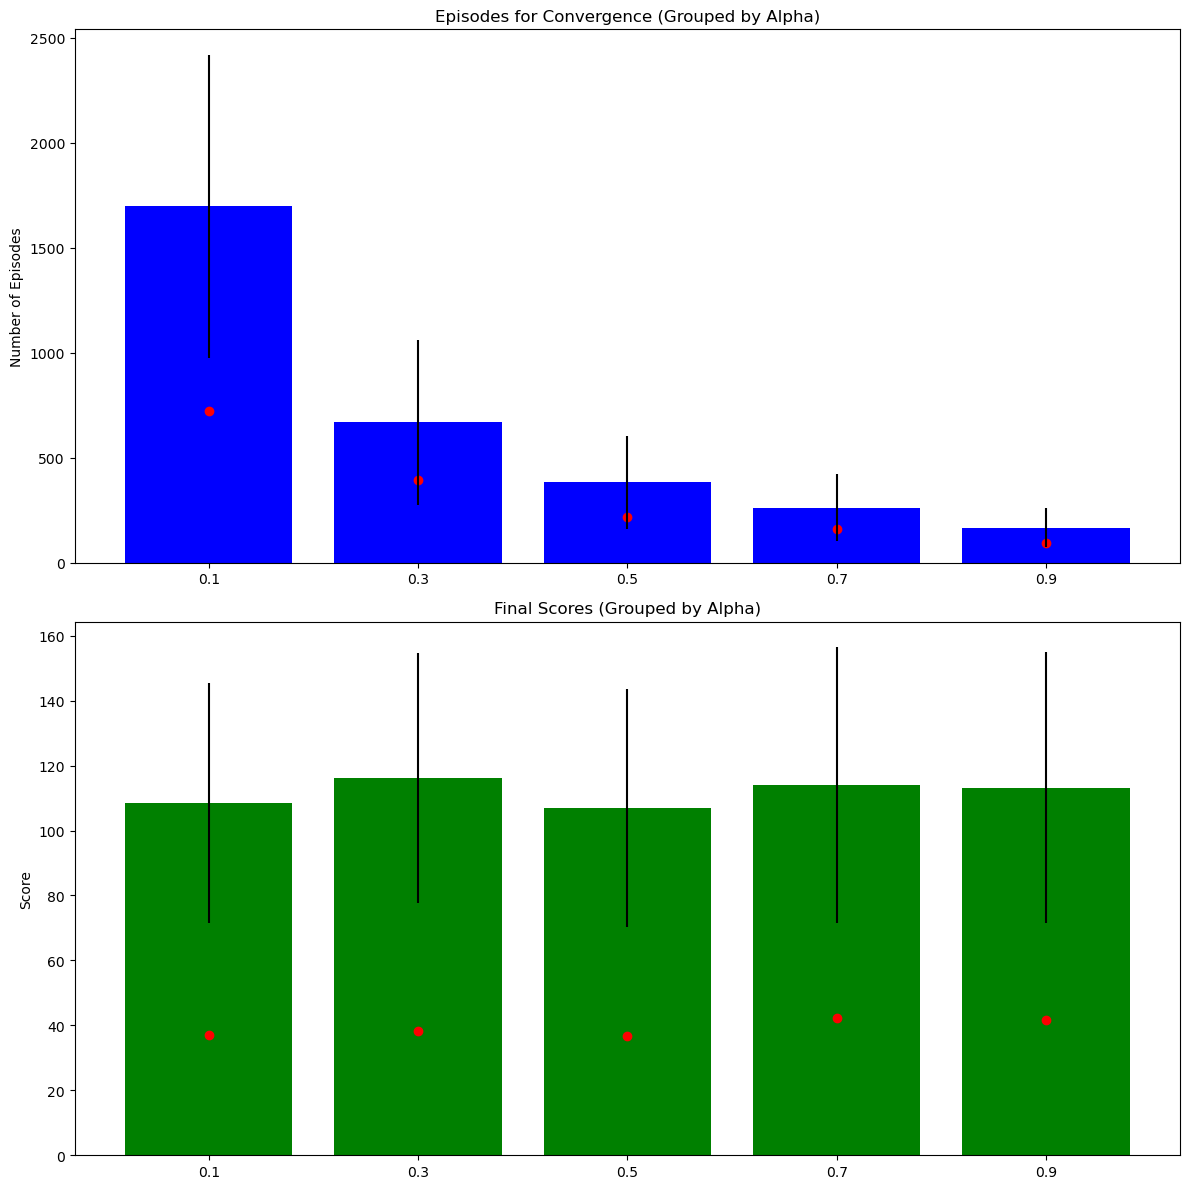

In [21]:
import matplotlib.pyplot as plt

# Grouping the Q-Learning results by Alpha (learning rate)
grouped_by_alpha = results_df[results_df['Method'] == 'Q-Learning'].groupby('Alpha').agg({
    'Episodes for Convergence': ['mean', 'std'],
    'Final Scores': ['mean', 'std']
}).reset_index()

# Plotting the results grouped by Alpha
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Episodes for Convergence grouped by Alpha
ax[0].bar(grouped_by_alpha['Alpha'], grouped_by_alpha['Episodes for Convergence', 'mean'], 
          yerr=grouped_by_alpha['Episodes for Convergence', 'std'], color='blue')
ax[0].scatter(grouped_by_alpha['Alpha'], grouped_by_alpha['Episodes for Convergence', 'std'], 
              color='red', marker='o', label='Standard Deviation')
ax[0].set_title('Episodes for Convergence (Grouped by Alpha)')
ax[0].set_ylabel('Number of Episodes')
ax[0].set_xticks(grouped_by_alpha['Alpha'])

# Final Scores grouped by Alpha
ax[1].bar(grouped_by_alpha['Alpha'], grouped_by_alpha['Final Scores', 'mean'], 
          yerr=grouped_by_alpha['Final Scores', 'std'], color='green')
ax[1].scatter(grouped_by_alpha['Alpha'], grouped_by_alpha['Final Scores', 'std'], 
              color='red', marker='o', label='Standard Deviation')
ax[1].set_title('Final Scores (Grouped by Alpha)')
ax[1].set_ylabel('Score')
ax[1].set_xticks(grouped_by_alpha['Alpha'])

plt.tight_layout()
plt.show()

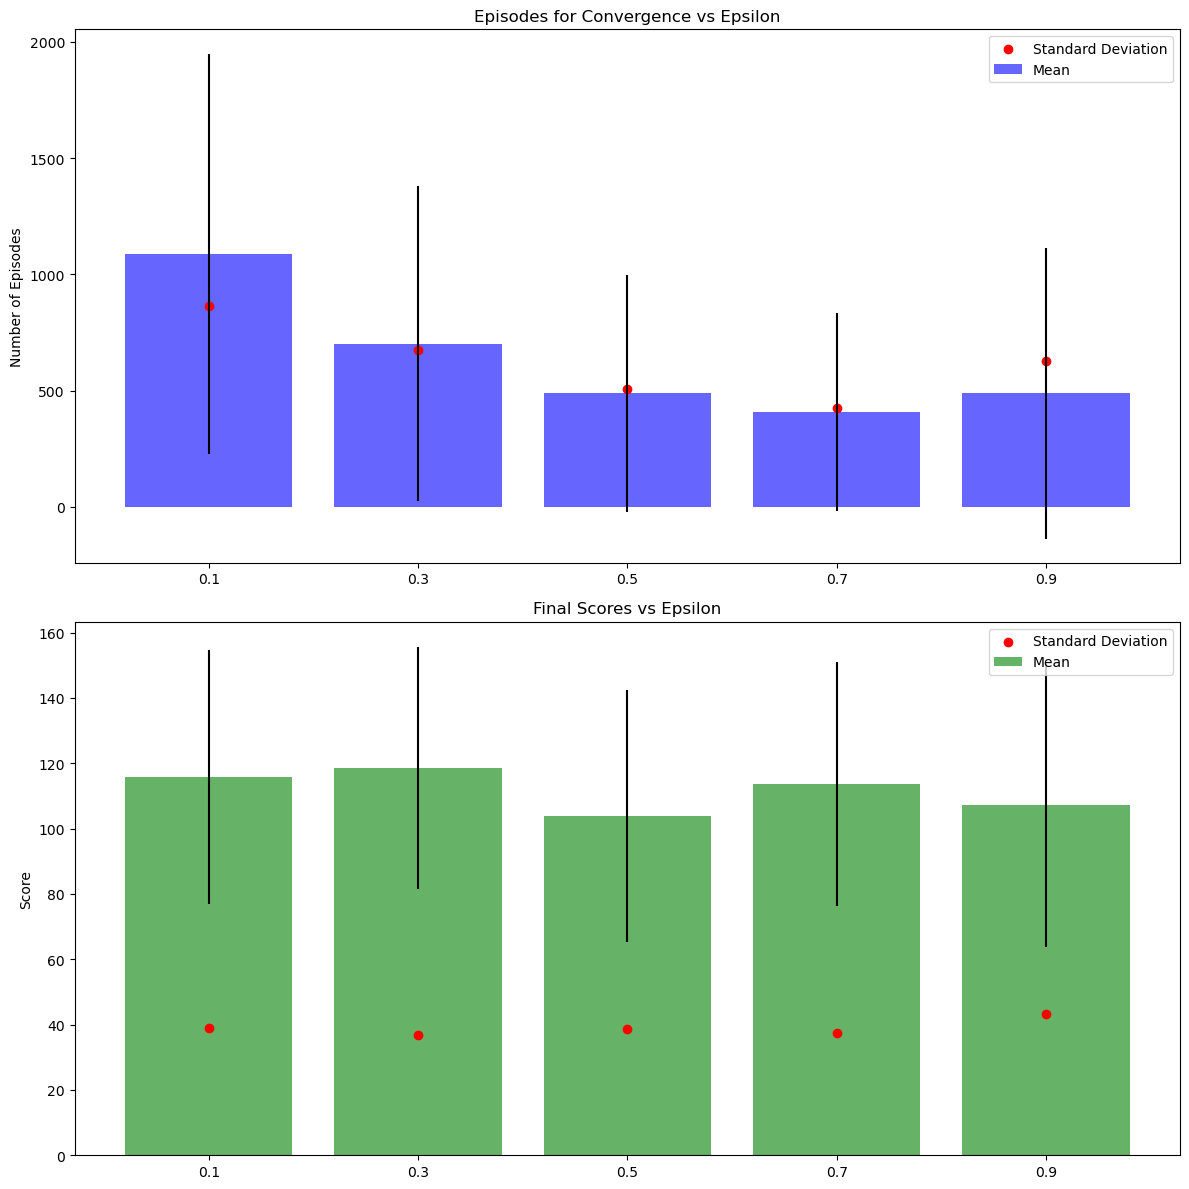

In [23]:
# Combining the mean and standard deviation visualizations for Episodes for Convergence and Final Scores against Epsilon

# Grouping the Q-Learning results by Alpha (learning rate)
grouped_by_epsilon = results_df[results_df['Method'] == 'Q-Learning'].groupby('Epsilon').agg({
    'Episodes for Convergence': ['mean', 'std'],
    'Final Scores': ['mean', 'std']
}).reset_index()

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Episodes for Convergence vs Epsilon
ax[0].bar(grouped_by_epsilon['Epsilon'], grouped_by_epsilon['Episodes for Convergence', 'mean'], 
          yerr=grouped_by_epsilon['Episodes for Convergence', 'std'], color='blue', alpha=0.6, label='Mean')
ax[0].scatter(grouped_by_epsilon['Epsilon'], grouped_by_epsilon['Episodes for Convergence', 'std'], 
              color='red', marker='o', label='Standard Deviation')
ax[0].set_title('Episodes for Convergence vs Epsilon')
ax[0].set_ylabel('Number of Episodes')
ax[0].set_xticks(grouped_by_epsilon['Epsilon'])
ax[0].legend()

# Final Scores vs Epsilon
ax[1].bar(grouped_by_epsilon['Epsilon'], grouped_by_epsilon['Final Scores', 'mean'], 
          yerr=grouped_by_epsilon['Final Scores', 'std'], color='green', alpha=0.6, label='Mean')
ax[1].scatter(grouped_by_epsilon['Epsilon'], grouped_by_epsilon['Final Scores', 'std'], 
              color='red', marker='o', label='Standard Deviation')
ax[1].set_title('Final Scores vs Epsilon')
ax[1].set_ylabel('Score')
ax[1].set_xticks(grouped_by_epsilon['Epsilon'])
ax[1].legend()

plt.tight_layout()
plt.show()

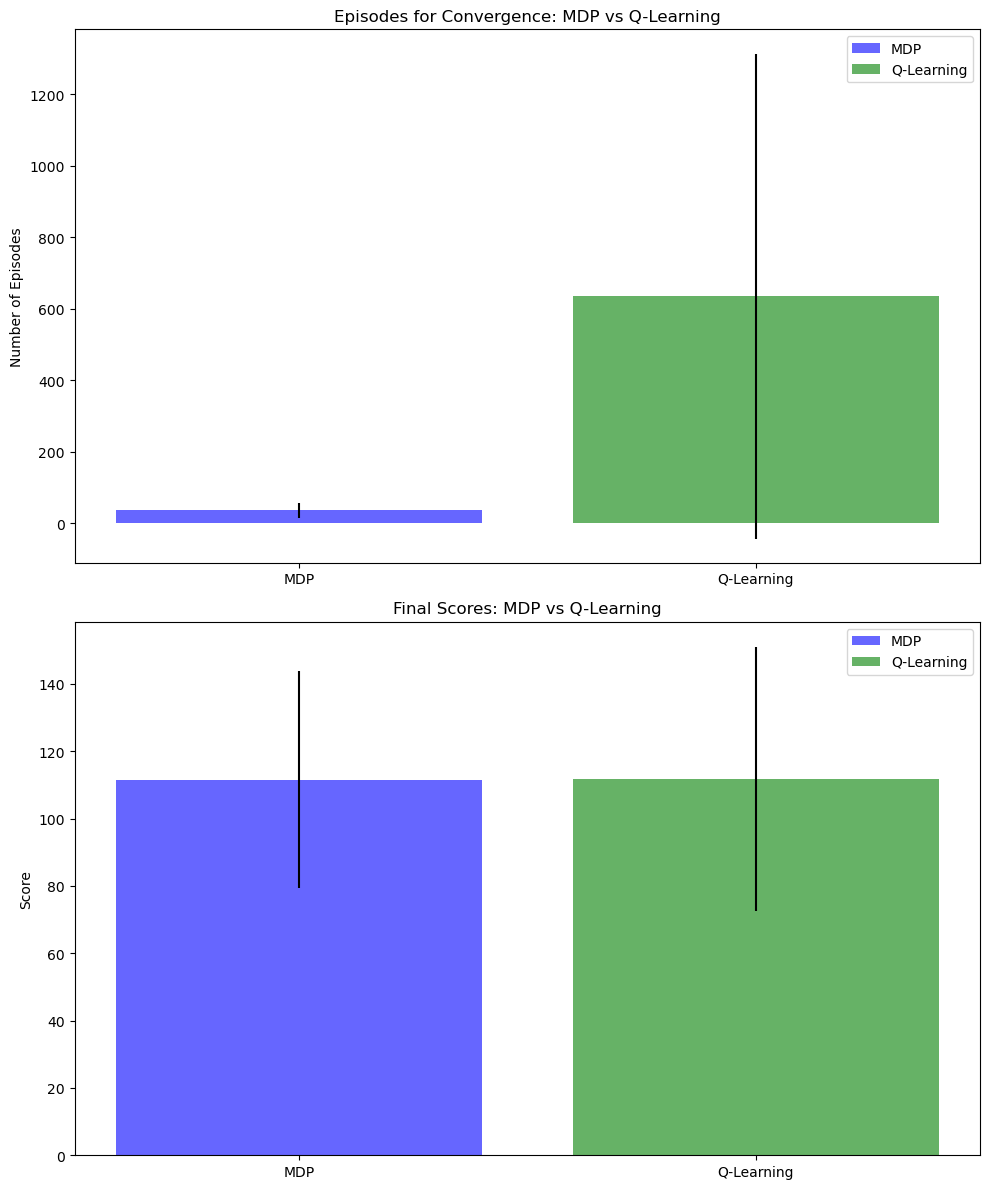

In [24]:
# Preparing data for visualization: Comparing MDP and Q-Learning
# Extracting mean and std values for both MDP and Q-Learning (averaged over all parameter combinations for Q-Learning)

# For Episodes for Convergence
mean_episodes_mdp = mdp_stats.loc['mean', 'Episodes for Convergence']
std_episodes_mdp = mdp_stats.loc['std', 'Episodes for Convergence']
mean_episodes_ql = results_df[results_df['Method'] == 'Q-Learning']['Episodes for Convergence'].mean()
std_episodes_ql = results_df[results_df['Method'] == 'Q-Learning']['Episodes for Convergence'].std()

# For Final Scores
mean_scores_mdp = mdp_stats.loc['mean', 'Final Scores']
std_scores_mdp = mdp_stats.loc['std', 'Final Scores']
mean_scores_ql = results_df[results_df['Method'] == 'Q-Learning']['Final Scores'].mean()
std_scores_ql = results_df[results_df['Method'] == 'Q-Learning']['Final Scores'].std()

# Plotting the comparison
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Episodes for Convergence
ax[0].bar('MDP', mean_episodes_mdp, yerr=std_episodes_mdp, color='blue', alpha=0.6, label='MDP')
ax[0].bar('Q-Learning', mean_episodes_ql, yerr=std_episodes_ql, color='green', alpha=0.6, label='Q-Learning')
ax[0].set_title('Episodes for Convergence: MDP vs Q-Learning')
ax[0].set_ylabel('Number of Episodes')
ax[0].legend()

# Final Scores
ax[1].bar('MDP', mean_scores_mdp, yerr=std_scores_mdp, color='blue', alpha=0.6, label='MDP')
ax[1].bar('Q-Learning', mean_scores_ql, yerr=std_scores_ql, color='green', alpha=0.6, label='Q-Learning')
ax[1].set_title('Final Scores: MDP vs Q-Learning')
ax[1].set_ylabel('Score')
ax[1].legend()

plt.tight_layout()
plt.show()